In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
import os

os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"
sns.set()

In [92]:
df1 = pd.read_csv('makan_gratis.csv')
df2 = pd.read_csv('presiden.csv')
df3 = pd.read_csv('makan_gratis.old.csv')

In [93]:
df1.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1861387822269374894,Tue Nov 26 23:59:13 +0000 2024,0,@tvOneNews DANANYA ADA? BUAT PROGRAM MAKAN SIA...,1861560370994798888,NaN,tvOneNews,in,NaN,0,0,0,https://x.com/ZahidFaoziah/status/186156037099...,1592022417290862593,ZahidFaoziah
1,1860834003542216759,Tue Nov 26 23:58:57 +0000 2024,0,@kegblgnunfaedh Supaya kalian Tau ..ada 2 prog...,1861560306339848404,NaN,kegblgnunfaedh,in,"Denpasar Selatan, Indonesia",0,1,0,https://x.com/araapriani78/status/186156030633...,1900014060,araapriani78
2,1861394482924789848,Tue Nov 26 23:53:41 +0000 2024,0,@CNNIndonesia Lebih baik tidak usah dipaksakan...,1861558981417939075,NaN,CNNIndonesia,in,"Ciamis, Jawa Barat, Indonesia",0,0,0,https://x.com/MIBarokah/status/186155898141793...,400103820,MIBarokah
3,1861417843788771442,Tue Nov 26 23:36:30 +0000 2024,2,@NenkMonica Rakyat tidak BUTUH makan Siang Gra...,1861554655878414655,NaN,NenkMonica,in,NaN,0,0,1,https://x.com/BL3H0_212/status/186155465587841...,1570037996145213440,BL3H0_212
4,1861381567089881311,Tue Nov 26 23:33:44 +0000 2024,1,@farizzlfdhl Tidak ada makan siang yg benar2 g...,1861553959762305309,NaN,farizzlfdhl,in,Zimbabwe,0,0,0,https://x.com/twkongko/status/1861553959762305309,179869955,twkongko


In [94]:
df = pd.concat([df1,df2,df3], join='outer')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1861387822269374894,Tue Nov 26 23:59:13 +0000 2024,0,@tvOneNews DANANYA ADA? BUAT PROGRAM MAKAN SIA...,1861560370994798888,NaN,tvOneNews,in,NaN,0,0,0,https://x.com/ZahidFaoziah/status/186156037099...,1592022417290862593,ZahidFaoziah
1,1860834003542216759,Tue Nov 26 23:58:57 +0000 2024,0,@kegblgnunfaedh Supaya kalian Tau ..ada 2 prog...,1861560306339848404,NaN,kegblgnunfaedh,in,"Denpasar Selatan, Indonesia",0,1,0,https://x.com/araapriani78/status/186156030633...,1900014060,araapriani78
2,1861394482924789848,Tue Nov 26 23:53:41 +0000 2024,0,@CNNIndonesia Lebih baik tidak usah dipaksakan...,1861558981417939075,NaN,CNNIndonesia,in,"Ciamis, Jawa Barat, Indonesia",0,0,0,https://x.com/MIBarokah/status/186155898141793...,400103820,MIBarokah
3,1861417843788771442,Tue Nov 26 23:36:30 +0000 2024,2,@NenkMonica Rakyat tidak BUTUH makan Siang Gra...,1861554655878414655,NaN,NenkMonica,in,NaN,0,0,1,https://x.com/BL3H0_212/status/186155465587841...,1570037996145213440,BL3H0_212
4,1861381567089881311,Tue Nov 26 23:33:44 +0000 2024,1,@farizzlfdhl Tidak ada makan siang yg benar2 g...,1861553959762305309,NaN,farizzlfdhl,in,Zimbabwe,0,0,0,https://x.com/twkongko/status/1861553959762305309,179869955,twkongko


In [95]:
df = df.drop_duplicates()
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1861387822269374894,Tue Nov 26 23:59:13 +0000 2024,0,@tvOneNews DANANYA ADA? BUAT PROGRAM MAKAN SIA...,1861560370994798888,NaN,tvOneNews,in,NaN,0,0,0,https://x.com/ZahidFaoziah/status/186156037099...,1592022417290862593,ZahidFaoziah
1,1860834003542216759,Tue Nov 26 23:58:57 +0000 2024,0,@kegblgnunfaedh Supaya kalian Tau ..ada 2 prog...,1861560306339848404,NaN,kegblgnunfaedh,in,"Denpasar Selatan, Indonesia",0,1,0,https://x.com/araapriani78/status/186156030633...,1900014060,araapriani78
2,1861394482924789848,Tue Nov 26 23:53:41 +0000 2024,0,@CNNIndonesia Lebih baik tidak usah dipaksakan...,1861558981417939075,NaN,CNNIndonesia,in,"Ciamis, Jawa Barat, Indonesia",0,0,0,https://x.com/MIBarokah/status/186155898141793...,400103820,MIBarokah
3,1861417843788771442,Tue Nov 26 23:36:30 +0000 2024,2,@NenkMonica Rakyat tidak BUTUH makan Siang Gra...,1861554655878414655,NaN,NenkMonica,in,NaN,0,0,1,https://x.com/BL3H0_212/status/186155465587841...,1570037996145213440,BL3H0_212
4,1861381567089881311,Tue Nov 26 23:33:44 +0000 2024,1,@farizzlfdhl Tidak ada makan siang yg benar2 g...,1861553959762305309,NaN,farizzlfdhl,in,Zimbabwe,0,0,0,https://x.com/twkongko/status/1861553959762305309,179869955,twkongko


In [96]:
df.shape

(869, 15)

In [97]:
df = df[['full_text', 'created_at', 'username']]
df.head()

,full_text,created_at,username
0,@tvOneNews DANANYA ADA? BUAT PROGRAM MAKAN SIA...,Tue Nov 26 23:59:13 +0000 2024,ZahidFaoziah
1,@kegblgnunfaedh Supaya kalian Tau ..ada 2 prog...,Tue Nov 26 23:58:57 +0000 2024,araapriani78
2,@CNNIndonesia Lebih baik tidak usah dipaksakan...,Tue Nov 26 23:53:41 +0000 2024,MIBarokah
3,@NenkMonica Rakyat tidak BUTUH makan Siang Gra...,Tue Nov 26 23:36:30 +0000 2024,BL3H0_212
4,@farizzlfdhl Tidak ada makan siang yg benar2 g...,Tue Nov 26 23:33:44 +0000 2024,twkongko


# VADER

In [98]:
pip install vaderSentiment

In [99]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [100]:
def get_sentiment(text):
    score = sa.polarity_scores(text)["compound"]
    if score >= 0.1:
        return "positive"
    elif score <= 0.1:
        return "negative"
    else:
        return "neutral"

In [101]:
df['sentiment'] = df['full_text'].apply(get_sentiment)

In [102]:
df['sentiment'].value_counts()

sentiment
negative    669
positive    200
Name: count, dtype: int64

In [103]:
df

,full_text,created_at,username,sentiment
0,@tvOneNews DANANYA ADA? BUAT PROGRAM MAKAN SIA...,Tue Nov 26 23:59:13 +0000 2024,ZahidFaoziah,positive
1,@kegblgnunfaedh Supaya kalian Tau ..ada 2 prog...,Tue Nov 26 23:58:57 +0000 2024,araapriani78,negative
2,@CNNIndonesia Lebih baik tidak usah dipaksakan...,Tue Nov 26 23:53:41 +0000 2024,MIBarokah,negative
3,@NenkMonica Rakyat tidak BUTUH makan Siang Gra...,Tue Nov 26 23:36:30 +0000 2024,BL3H0_212,positive
4,@farizzlfdhl Tidak ada makan siang yg benar2 g...,Tue Nov 26 23:33:44 +0000 2024,twkongko,negative
...,...,...,...,...
377,@narkosun Jadi begini porsi makan siang gratis...,Sun Nov 24 07:29:04 +0000 2024,BGomarus46046,positive
378,@BocorAlusPol Kalau weekend makan siang gratis...,Sun Nov 24 07:28:08 +0000 2024,DS_yantie,negative
379,@narkosun Tidak apa apa dek jangan takut negar...,Sun Nov 24 07:26:46 +0000 2024,BGomarus46046,negative
380,Makan siang gratis itu ladang korupsi dari seg...,Sun Nov 24 07:24:01 +0000 2024,jerukbusukkkk,negative


In [104]:
df.iloc[3,0]

'@NenkMonica Rakyat tidak BUTUH makan Siang Gratis tp BUTUH Pendidikan Gratis dari SD smp Universitas'

In [105]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Text(0, 0.5, 'Nilai Hasil')

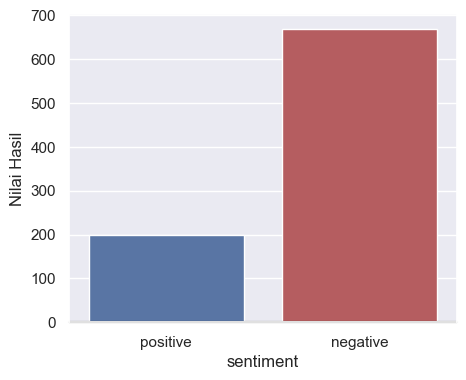

In [106]:
fig, ax1 = plt.subplots(1,1, figsize=(5, 4), sharex=True)

sns.countplot(x="sentiment", data=df, palette=["b", "r"], ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nilai Hasil")

# BERT

In [107]:
pip install --upgrade grapevine

Note: you may need to restart the kernel to use updated packages.


In [116]:
from scipy.special import softmax
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [117]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [119]:
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [120]:
text = df['full_text']

In [121]:
results = sentiment_pipeline(text)

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#', '', text)  
    text = re.sub(r'http\S+', '', text)
    return text.strip()

In [ ]:
def predict_sentiment_multi_class(text):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=128, padding=True)
    output = model(**encoded_input)
    scores = softmax(output.logits.detach().numpy()[0])
    labels = ['negative', 'neutral', 'positive']
    return labels[scores.argmax()]

In [ ]:
df['sentiment'] = df['full_text'].apply(clean_text)

In [ ]:
df['sentiment'] = df['full_text'].apply(predict_sentiment_multi_class)

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(5, 4), sharex=True)

sns.countplot(x="sentiment", data=df, palette=["b", "r"], ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Nilai Hasil")

In [ ]:
df